# <b>EDA on USA County<b>

# <b>Introduction<b>
This project purpose is show relation between "County" & "State" variable to others.

# <b>Import Packeges<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <b>Import Dataset<b>

In [2]:
df=pd.read_csv(r"C:\Users\Administrator\Desktop\Dream with python\PROJECT\United States counties dataset\usacounty_dataset.csv")

In [3]:
df.head(30)

,county,state,founded,largest_city,pop_total,pop_den,total_area,land_area,water_area
0,Autauga County,Alabama,"November 21, 1818",Prattville,"58,805",97/sq mi (38/km,"604 sq mi (1,560 km","594 sq mi (1,540 km",10 sq mi (30 km
1,Chilton County,Alabama,"December 30, 1868",Clanton,"45,014",64/sq mi (25/km,"701 sq mi (1,820 km","693 sq mi (1,790 km",7.9 sq mi (20 km
2,Conecuh County,Alabama,"February 13, 1818",Evergreen,"11,597",14/sq mi (5.2/km,"853 sq mi (2,210 km","850 sq mi (2,200 km",2.6 sq mi (7 km
3,Barbour County,Alabama,"December 18, 1832",Eufaula,"25,223",28/sq mi (11/km,"905 sq mi (2,340 km","885 sq mi (2,290 km",20 sq mi (50 km
4,Bullock County,Alabama,"December 5 (created), 1866",Union Springs,"10,357",17/sq mi (6.4/km,"625 sq mi (1,620 km","623 sq mi (1,610 km",2.3 sq mi (6 km
5,Colbert County,Alabama,"February 6, 1867",Muscle Shoals,"57,227",92/sq mi (36/km,"622 sq mi (1,610 km","593 sq mi (1,540 km",30 sq mi (80 km
6,Bibb County,Alabama,"February 7, 1818",Brent,"22,293",36/sq mi (14/km,"626 sq mi (1,620 km","623 sq mi (1,610 km",3.6 sq mi (9 km
7,Blount County,Alabama,"February 6, 1818",Oneonta,"59,134",91/sq mi (35/km,"651 sq mi (1,690 km","645 sq mi (1,670 km",5.9 sq mi (15 km
8,Coffee County,Alabama,"December 29, 1841",Enterprise,"53,465",79/sq mi (30/km,"680 sq mi (1,800 km","679 sq mi (1,760 km",1.5 sq mi (4 km
9,Cherokee County,Alabama,"January 9, 1836",Centre,"24,971",42/sq mi (16/km,"600 sq mi (2,000 km","554 sq mi (1,430 km",46 sq mi (120 km


# <b>Info about Data<b>

In [4]:
df.shape

(3245, 9)

In [5]:
df.columns

Index(['county', 'state', 'founded', 'largest_city', 'pop_total', 'pop_den',
       'total_area', 'land_area', 'water_area'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   county        3241 non-null   object
 1   state         3011 non-null   object
 2   founded       3069 non-null   object
 3   largest_city  2472 non-null   object
 4   pop_total     3137 non-null   object
 5   pop_den       3188 non-null   object
 6   total_area    3187 non-null   object
 7   land_area     3209 non-null   object
 8   water_area    3205 non-null   object
dtypes: object(9)
memory usage: 228.3+ KB


# <b>Data Cleaning<b>

In [7]:
df.isnull().sum()

county            4
state           234
founded         176
largest_city    773
pop_total       108
pop_den          57
total_area       58
land_area        36
water_area       40
dtype: int64

In [8]:
df.dropna(subset=['county'],inplace=True)
#only 4 values are missing,so I drop entire row which make not much sense to the dataset

In [9]:
df['state'].ffill(inplace=True)
#observe the dataset the state variable values are repeated so forward fill.

In [10]:
df['founded'].bfill(inplace=True)
#founded date can be same,i choose bacward fill to fill the null values.

In [11]:
#df.dropna(subset='largest_city',inplace=True)
# 773 values are null,largest city is different from state to state,so i drop that row.

<b>Extract Numeric value<b>

In [12]:
import re

In [13]:
numeric=df['pop_den'].str.extract(r'(\d+)',expand=False)
df['pop_den'] = numeric.astype('float64')
print(df['pop_den'])

0        97.0
1        64.0
2        14.0
3        28.0
4        17.0
        ...  
3240     44.0
3241     47.0
3242     82.0
3243     59.0
3244    270.0
Name: pop_den, Length: 3241, dtype: float64


In [14]:
numeric=df['total_area'].str.extract(r'(\d+)',expand=False)
df['total_area'] = numeric.astype('float64')
print(df['total_area'])

0       604.0
1       701.0
2       853.0
3       905.0
4       625.0
        ...  
3240    390.0
3241    439.0
3242    329.0
3243    472.0
3244    212.0
Name: total_area, Length: 3241, dtype: float64


In [15]:
numeric=df['land_area'].str.extract(r'(\d+)',expand=False)
df['land_area'] = numeric.astype('float64')
print(df['land_area'])

0       594.0
1       693.0
2       850.0
3       885.0
4       623.0
        ...  
3240    385.0
3241    437.0
3242    328.0
3243    464.0
3244    210.0
Name: land_area, Length: 3241, dtype: float64


In [16]:
numeric=df['water_area'].str.extract(r'(\d+)',expand=False)
df['water_area'] = numeric.astype('float64')
print(df['water_area'])

0       10.0
1        7.0
2        2.0
3       20.0
4        2.0
        ... 
3240     4.0
3241     1.0
3242     1.0
3243     7.0
3244     2.0
Name: water_area, Length: 3241, dtype: float64


<b>Rename Column<b>

In [17]:
names=['County','State','Founded','Largest_City','PoP_Total','Pop_Density(Sq-Mi)','Total_Area(Sq-Mi)','Land_Area(Sq-Mi)','Water_Area(Sq-Mi)']
df.columns=names

In [18]:
df.dtypes

County                 object
State                  object
Founded                object
Largest_City           object
PoP_Total              object
Pop_Density(Sq-Mi)    float64
Total_Area(Sq-Mi)     float64
Land_Area(Sq-Mi)      float64
Water_Area(Sq-Mi)     float64
dtype: object

In [19]:
df.head(30)

,County,State,Founded,Largest_City,PoP_Total,Pop_Density(Sq-Mi),Total_Area(Sq-Mi),Land_Area(Sq-Mi),Water_Area(Sq-Mi)
0,Autauga County,Alabama,"November 21, 1818",Prattville,"58,805",97.0,604.0,594.0,10.0
1,Chilton County,Alabama,"December 30, 1868",Clanton,"45,014",64.0,701.0,693.0,7.0
2,Conecuh County,Alabama,"February 13, 1818",Evergreen,"11,597",14.0,853.0,850.0,2.0
3,Barbour County,Alabama,"December 18, 1832",Eufaula,"25,223",28.0,905.0,885.0,20.0
4,Bullock County,Alabama,"December 5 (created), 1866",Union Springs,"10,357",17.0,625.0,623.0,2.0
5,Colbert County,Alabama,"February 6, 1867",Muscle Shoals,"57,227",92.0,622.0,593.0,30.0
6,Bibb County,Alabama,"February 7, 1818",Brent,"22,293",36.0,626.0,623.0,3.0
7,Blount County,Alabama,"February 6, 1818",Oneonta,"59,134",91.0,651.0,645.0,5.0
8,Coffee County,Alabama,"December 29, 1841",Enterprise,"53,465",79.0,680.0,679.0,1.0
9,Cherokee County,Alabama,"January 9, 1836",Centre,"24,971",42.0,600.0,554.0,46.0


# <b>Summary Statistics<b>

In [20]:
df.describe()

,Pop_Density(Sq-Mi),Total_Area(Sq-Mi),Land_Area(Sq-Mi),Water_Area(Sq-Mi)
count,3188.000000,3187.000000,3207.000000,3201.000000
mean,97.645232,412.812363,416.789835,39.685411
std,160.909045,309.694092,300.794668,111.380432
min,0.000000,0.000000,0.000000,0.000000
25%,11.750000,18.500000,70.500000,2.000000
50%,38.000000,440.000000,441.000000,7.000000
75%,96.000000,649.000000,637.500000,22.000000
max,994.000000,999.000000,999.000000,974.000000


# <b>Data Visualization <b>

In [21]:
#

# <b> Target Variable:State

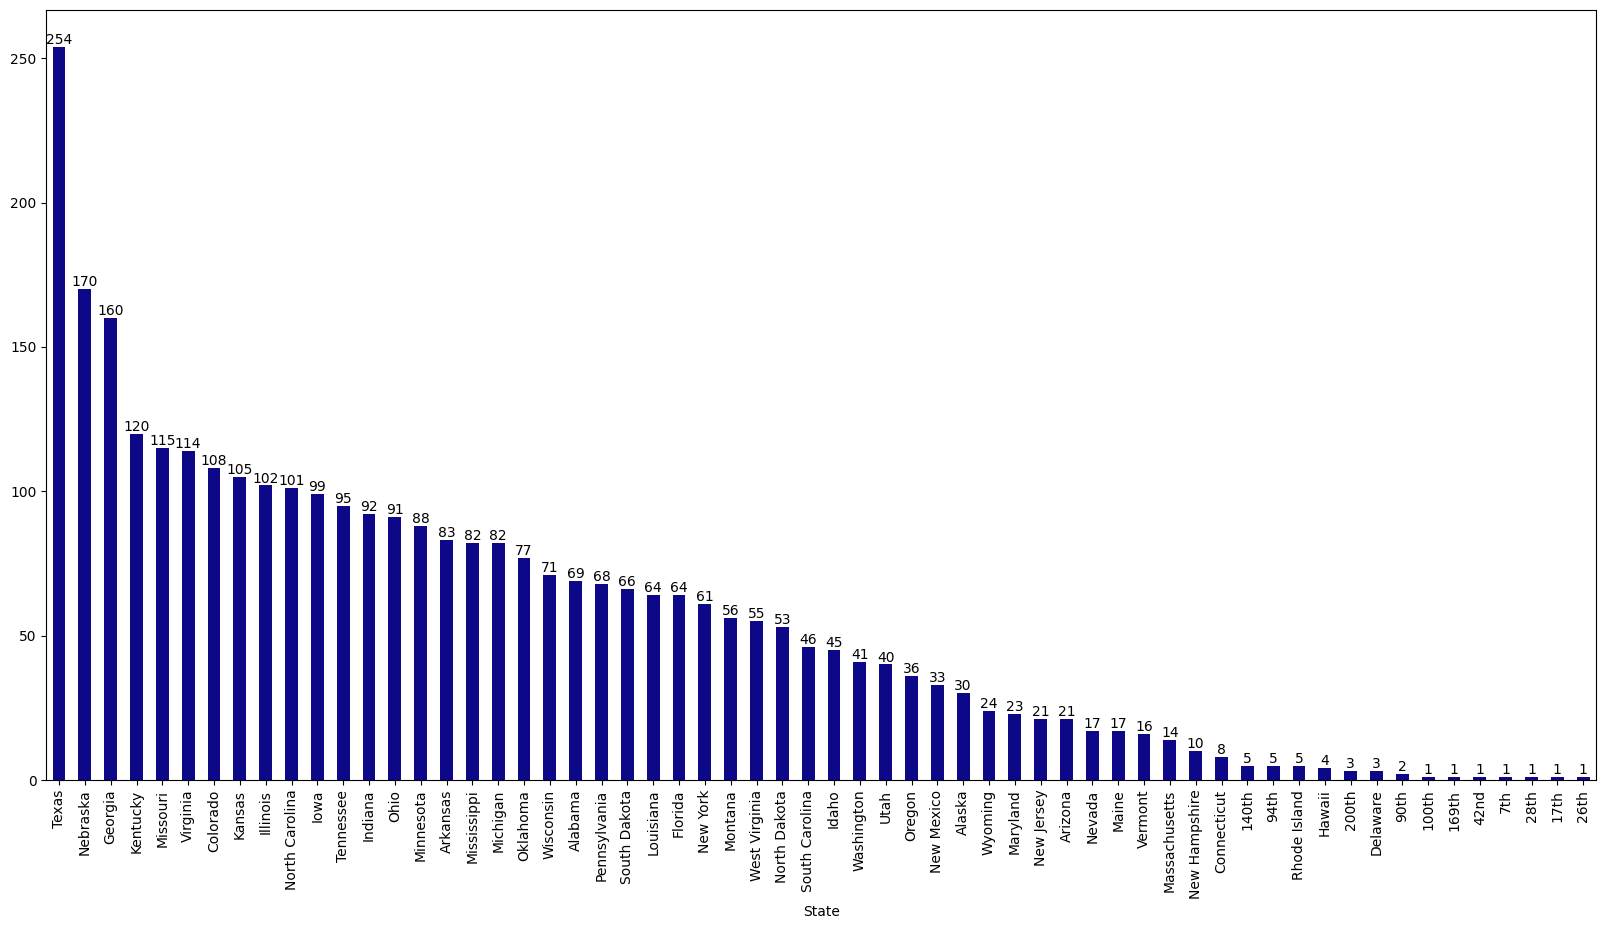

In [22]:
plt.figure(figsize=(20,10))
df['State'].value_counts().plot(kind='bar',colormap='plasma')
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height}',(width, height),ha='center',va='bottom')

<b>In above bar chart,notice that some irrelevent state name,so i'm going to drop those name<b>

In [23]:
# hahaaa,at first i wrote this massive code,then I copy this and make a prompt in Ai for simplify this code.

'''df.drop( df [ df['State'] == '7th' ].index , inplace=True)
df.drop( df [ df['State'] == '17th' ].index , inplace=True)
df.drop( df [ df['State'] == '6th' ].index , inplace=True)
df.drop( df [ df['State'] == '26th' ].index , inplace=True)
df.drop( df [ df['State'] == '28th' ].index , inplace=True)
df.drop( df [ df['State'] == '90th' ].index , inplace=True)
df.drop( df [ df['State'] == '94th' ].index , inplace=True)
df.drop( df [ df['State'] == '100th' ].index , inplace=True)
df.drop( df [ df['State'] == '140th' ].index , inplace=True)
df.drop( df [ df['State'] == '169th' ].index , inplace=True)
df.drop( df [ df['State'] == '200th' ].index , inplace=True)
df.drop( df [ df['State'] == '42nd' ].index , inplace=True)'''

"df.drop( df [ df['State'] == '7th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '17th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '6th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '26th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '28th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '90th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '94th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '100th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '140th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '169th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '200th' ].index , inplace=True)\ndf.drop( df [ df['State'] == '42nd' ].index , inplace=True)"

<b>For keep original data intact<b>

In [24]:
df1=df.copy()

In [25]:
values_to_remove = ['7th', '17th', '6th', '26th', '28th', '90th', '94th', '100th', '140th', '169th', '200th', '42nd']
df1.drop(df [df1 ['State'] .isin(values_to_remove)].index, inplace=True)

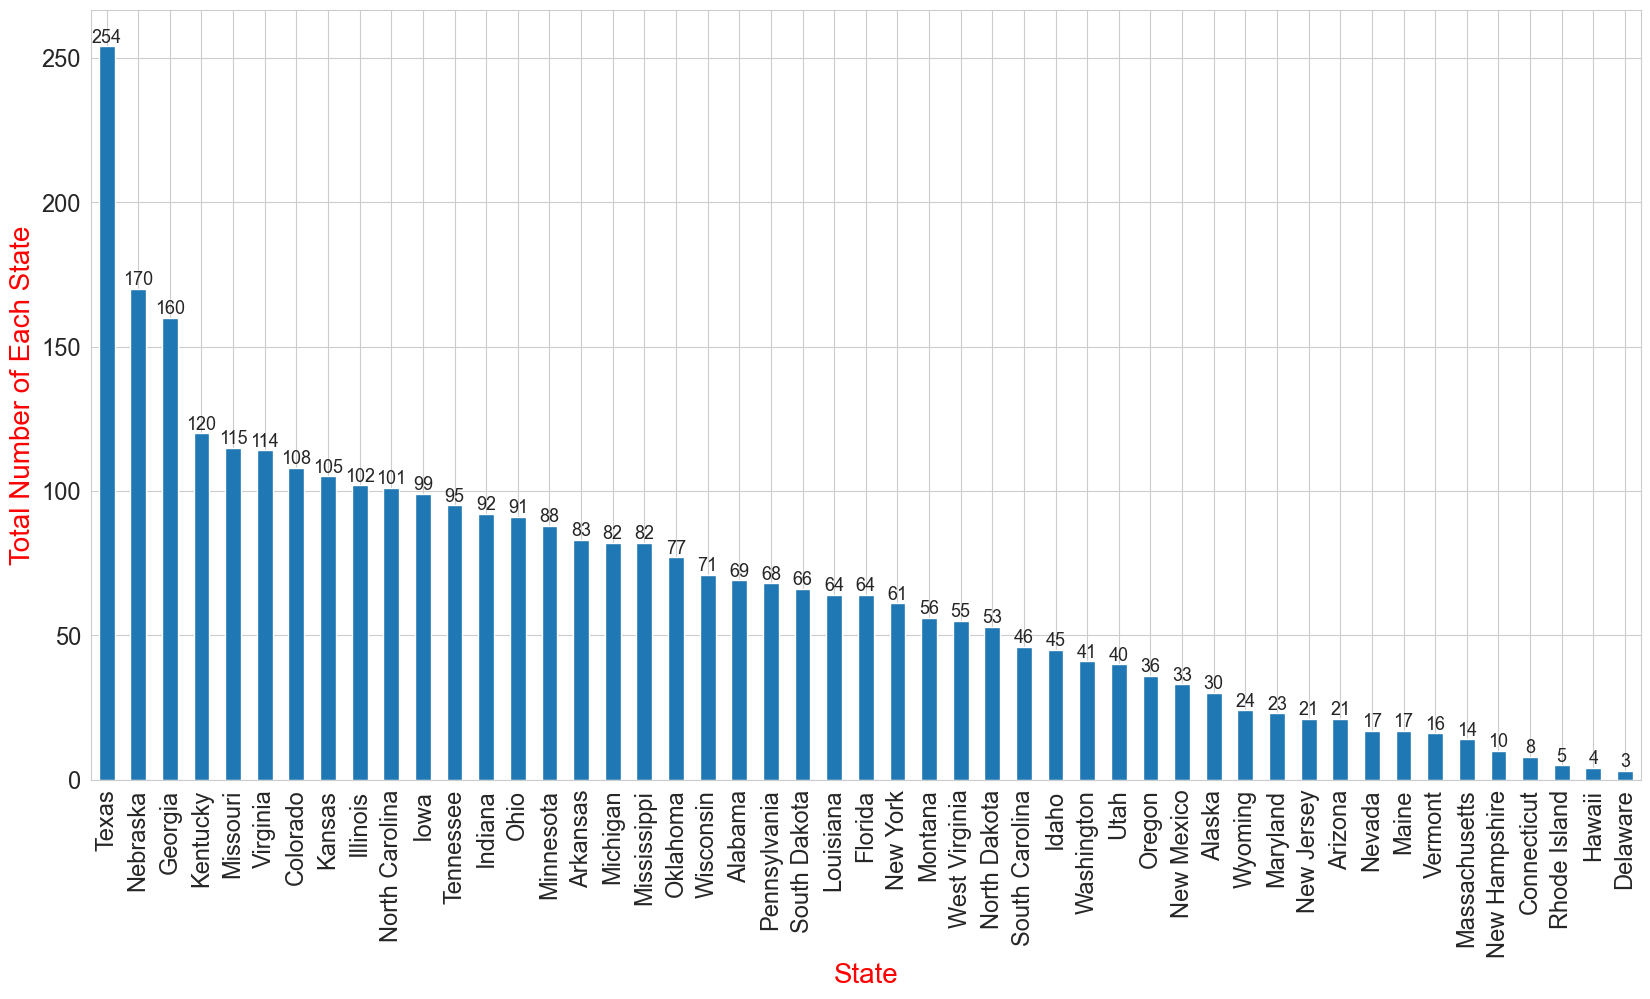

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
df1['State'].value_counts().plot(kind='bar',fontsize=17)
plt.xlabel('State',fontdict={'size':20,'color':'red'})
plt.ylabel('Total Number of Each State',fontdict={'size':20,'color':'red'})
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height}',(width, height),ha='center',va='bottom',fontsize=13)

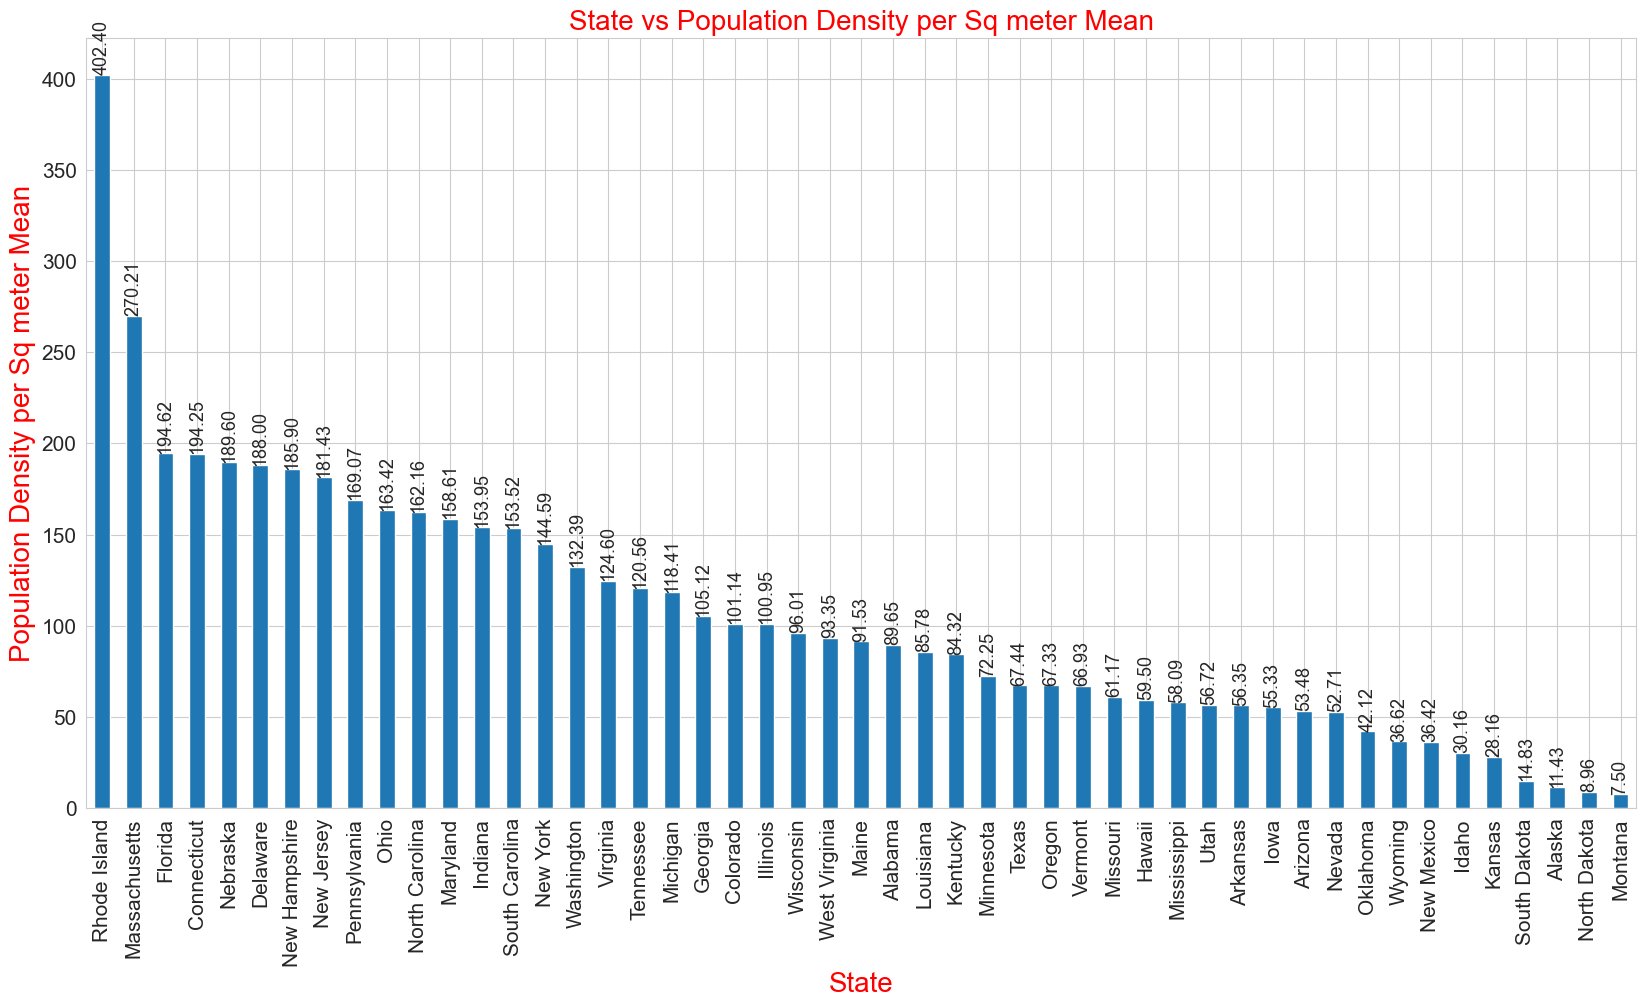

In [41]:
df1.groupby('State')['Pop_Density(Sq-Mi)'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,10),fontsize=15)
plt.xlabel('State',fontdict={'size':20,'color':'red'})
plt.ylabel('Population Density per Sq meter Mean',fontdict={'size':20,'color':'red'})
plt.title('State vs Population Density per Sq meter Mean',fontdict={'size':20,'color':'red'})
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height:.2f}',(width, height),ha='center',va='bottom',rotation=90,fontsize=13)

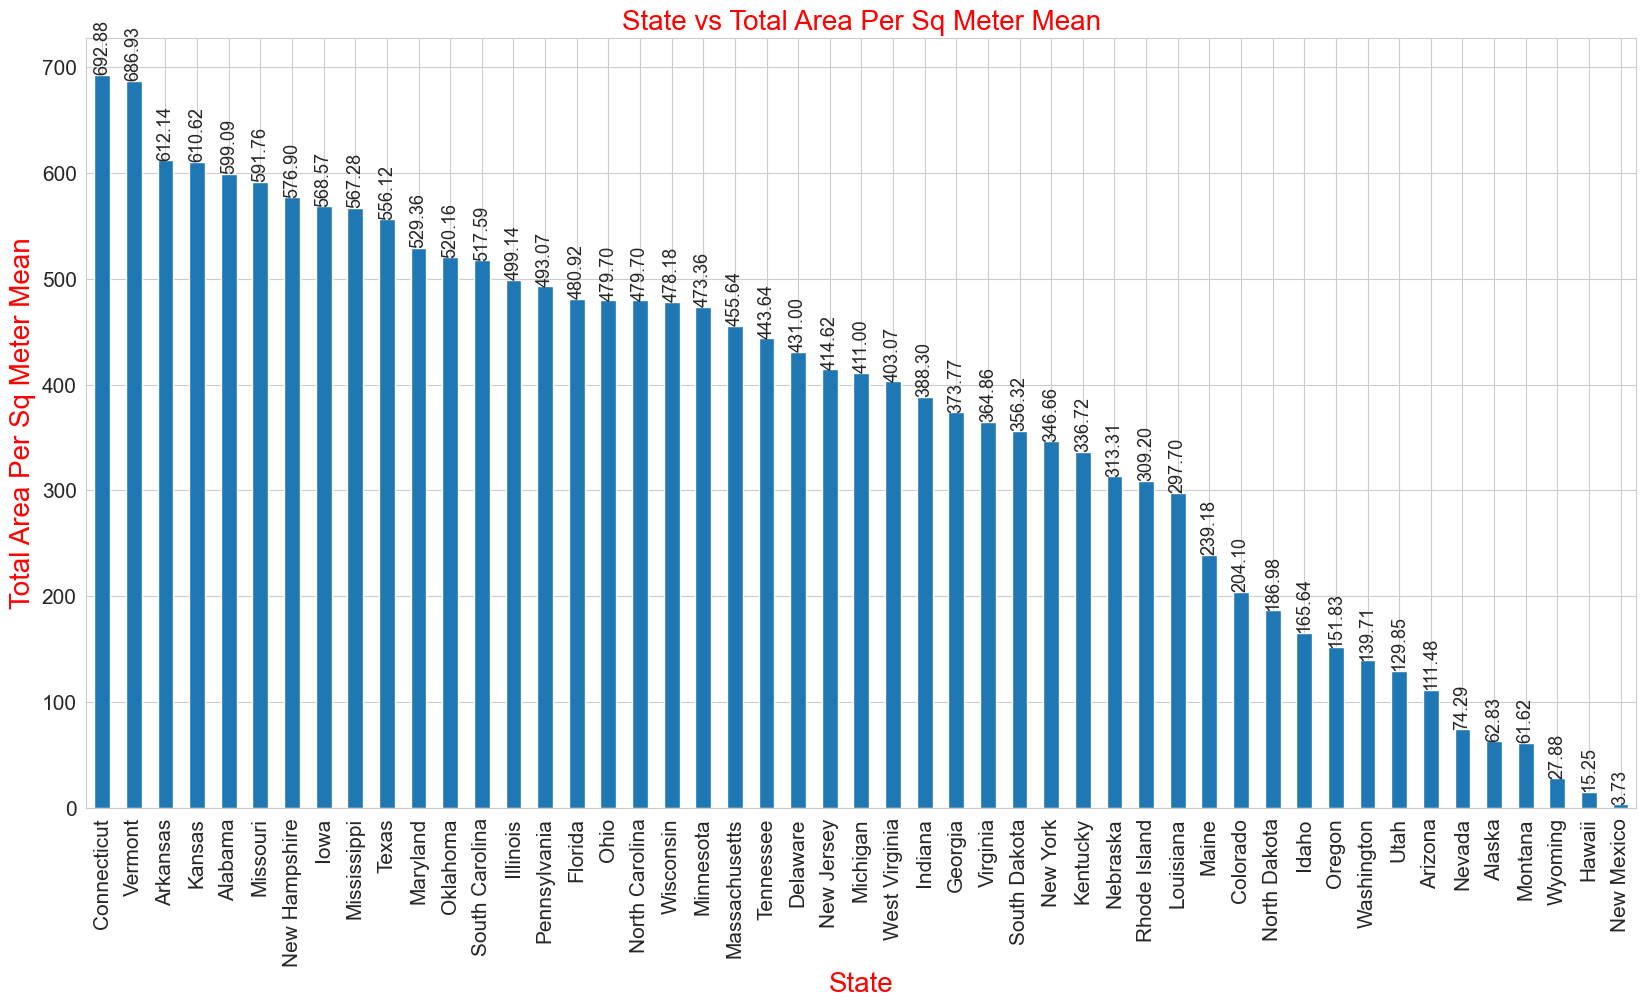

In [40]:
df1.groupby('State')['Total_Area(Sq-Mi)'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,10),fontsize=15)
plt.xlabel('State',fontdict={'size':'20','color':'red'})
plt.ylabel('Total Area Per Sq Meter Mean',fontdict={'size':'20','color':'red'})
plt.title('State vs Total Area Per Sq Meter Mean',fontdict={'size':'20','color':'red'})
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height:.2f}',(width, height),ha='center',va='bottom',rotation=90,fontsize=13)

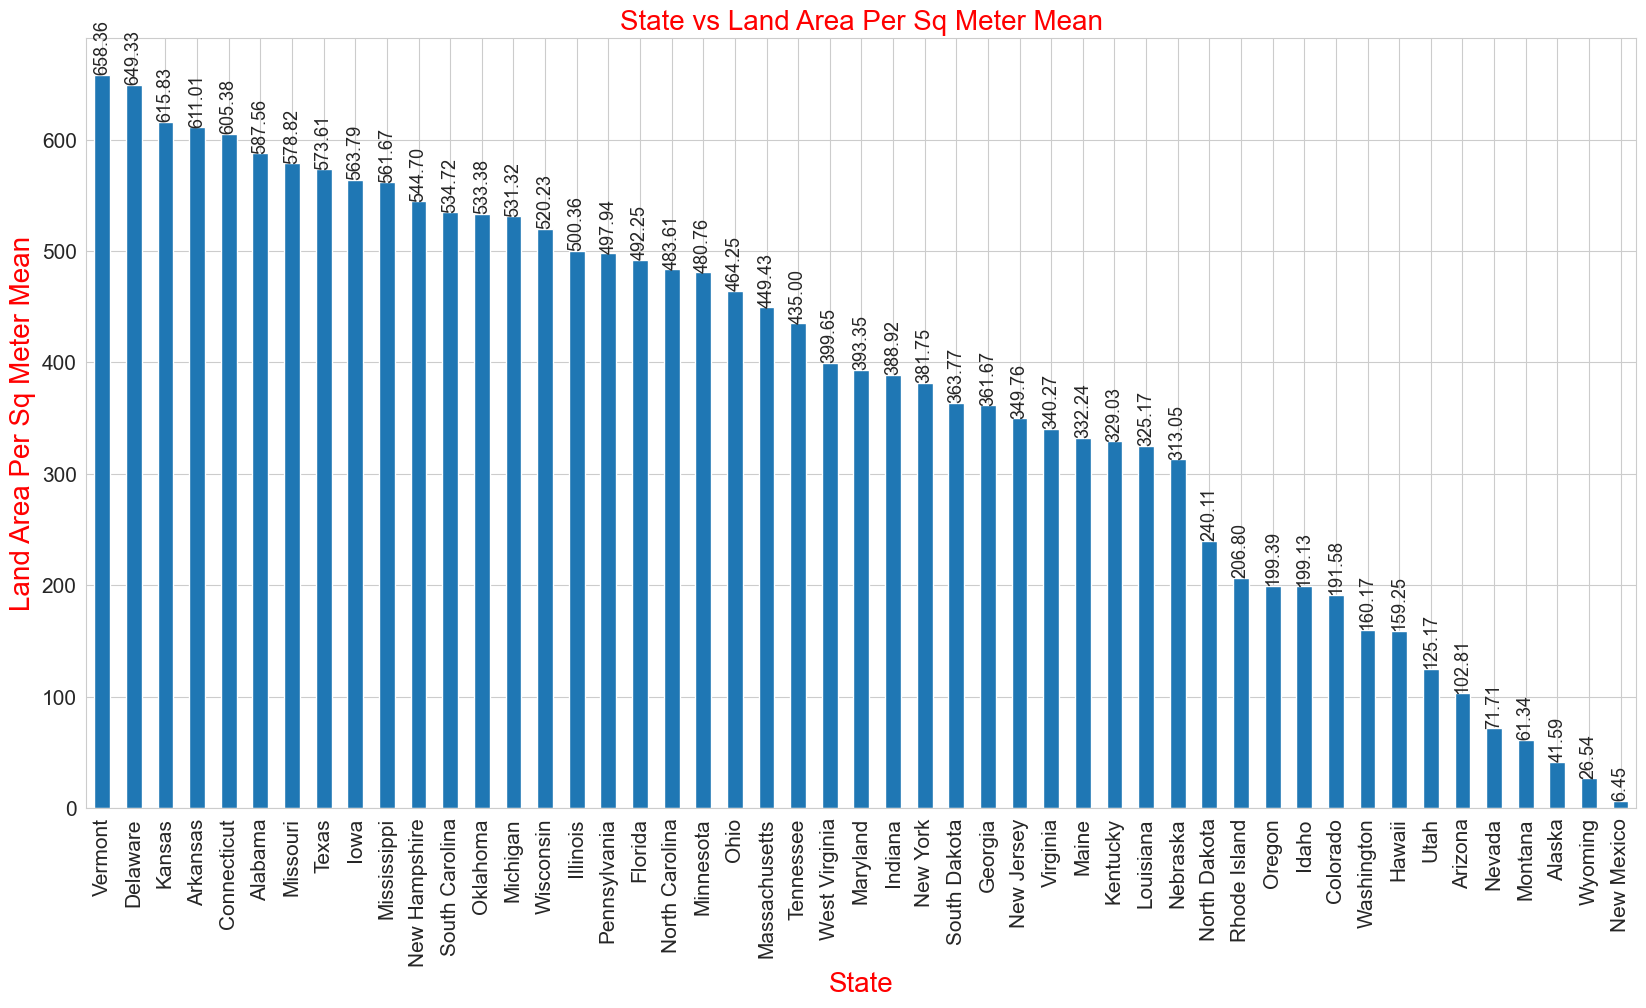

In [39]:
df1.groupby('State')['Land_Area(Sq-Mi)'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,10),fontsize=15)
plt.xlabel('State',fontdict={'size':'20','color':'red'})
plt.ylabel('Land Area Per Sq Meter Mean',fontdict={'size':'20','color':'red'})
plt.title('State vs Land Area Per Sq Meter Mean',fontdict={'size':'20','color':'red'})
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height:.2f}',(width, height),ha='center',va='bottom',rotation=90,fontsize=13)

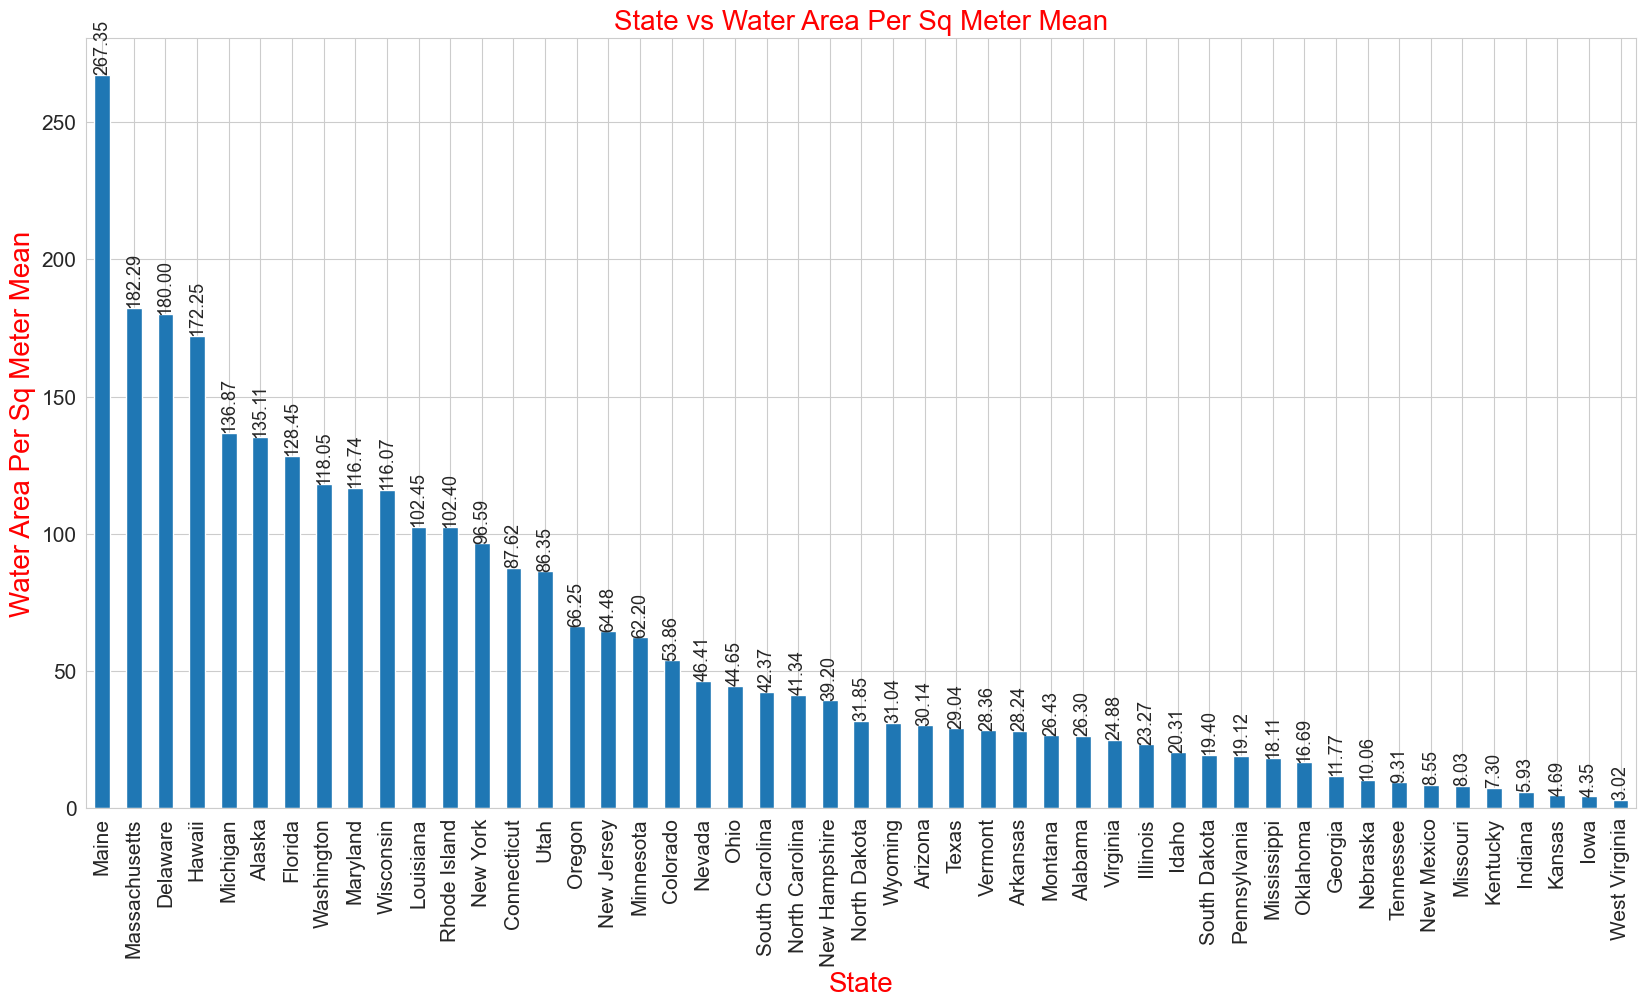

In [30]:
df1.groupby('State')['Water_Area(Sq-Mi)'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,10),fontsize=15)
plt.xlabel('State',fontdict={'size':'20','color':'red'})
plt.ylabel('Water Area Per Sq Meter Mean',fontdict={'size':'20','color':'red'})
plt.title('State vs Water Area Per Sq Meter Mean',fontdict={'size':'20','color':'red'})
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height:.2f}',(width, height),ha='center',va='bottom',rotation=90,fontsize=13)

# <b>Target Variable: County<b>

<b>According to top 50<b>

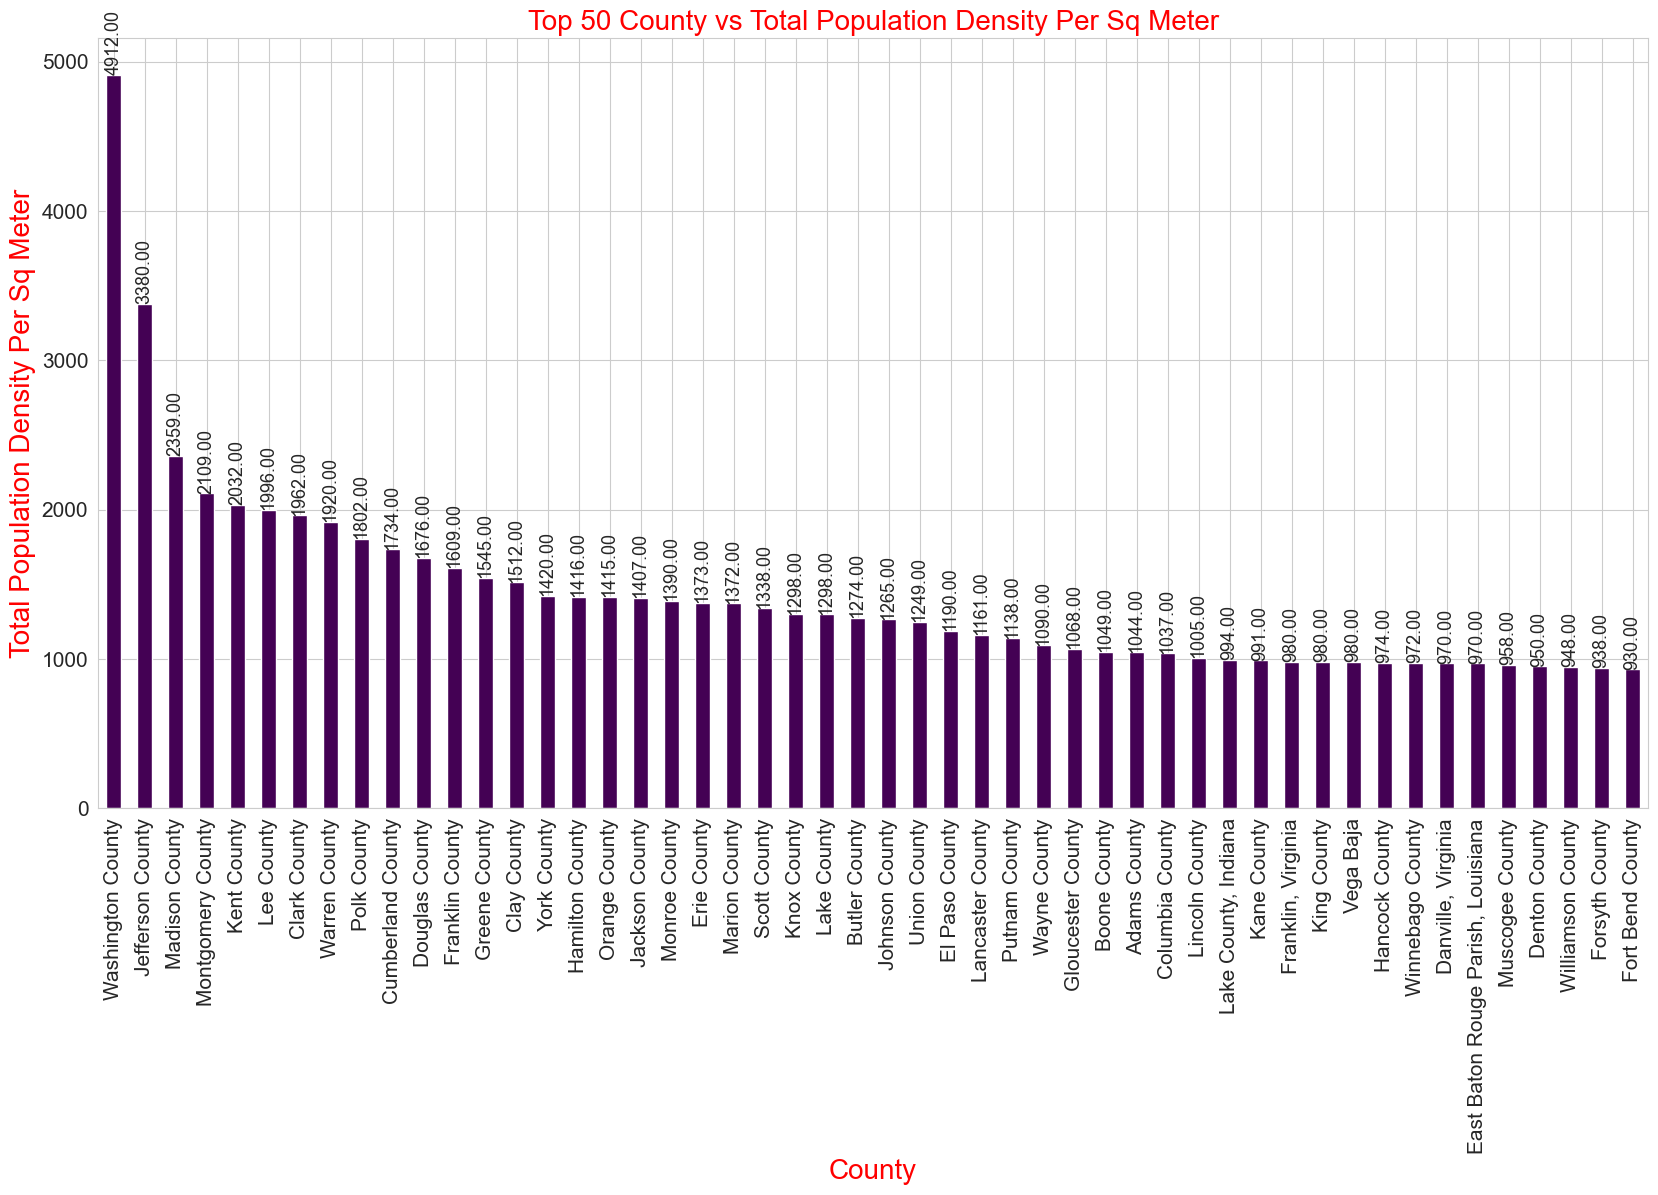

In [31]:
top_counties = df.groupby('County')['Pop_Density(Sq-Mi)'].sum().nlargest(50)
top_counties.plot(kind='bar', figsize=(20,10),fontsize=15,colormap='viridis')
plt.xlabel('County',fontdict={'size':'20','color':'red'})
plt.ylabel('Total Population Density Per Sq Meter',fontdict={'size':'20','color':'red'})
plt.title('Top 50 County vs Total Population Density Per Sq Meter',fontdict={'size':'20','color':'red'})
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height:.2f}',(width, height),ha='center',va='bottom',rotation=90,fontsize=13)


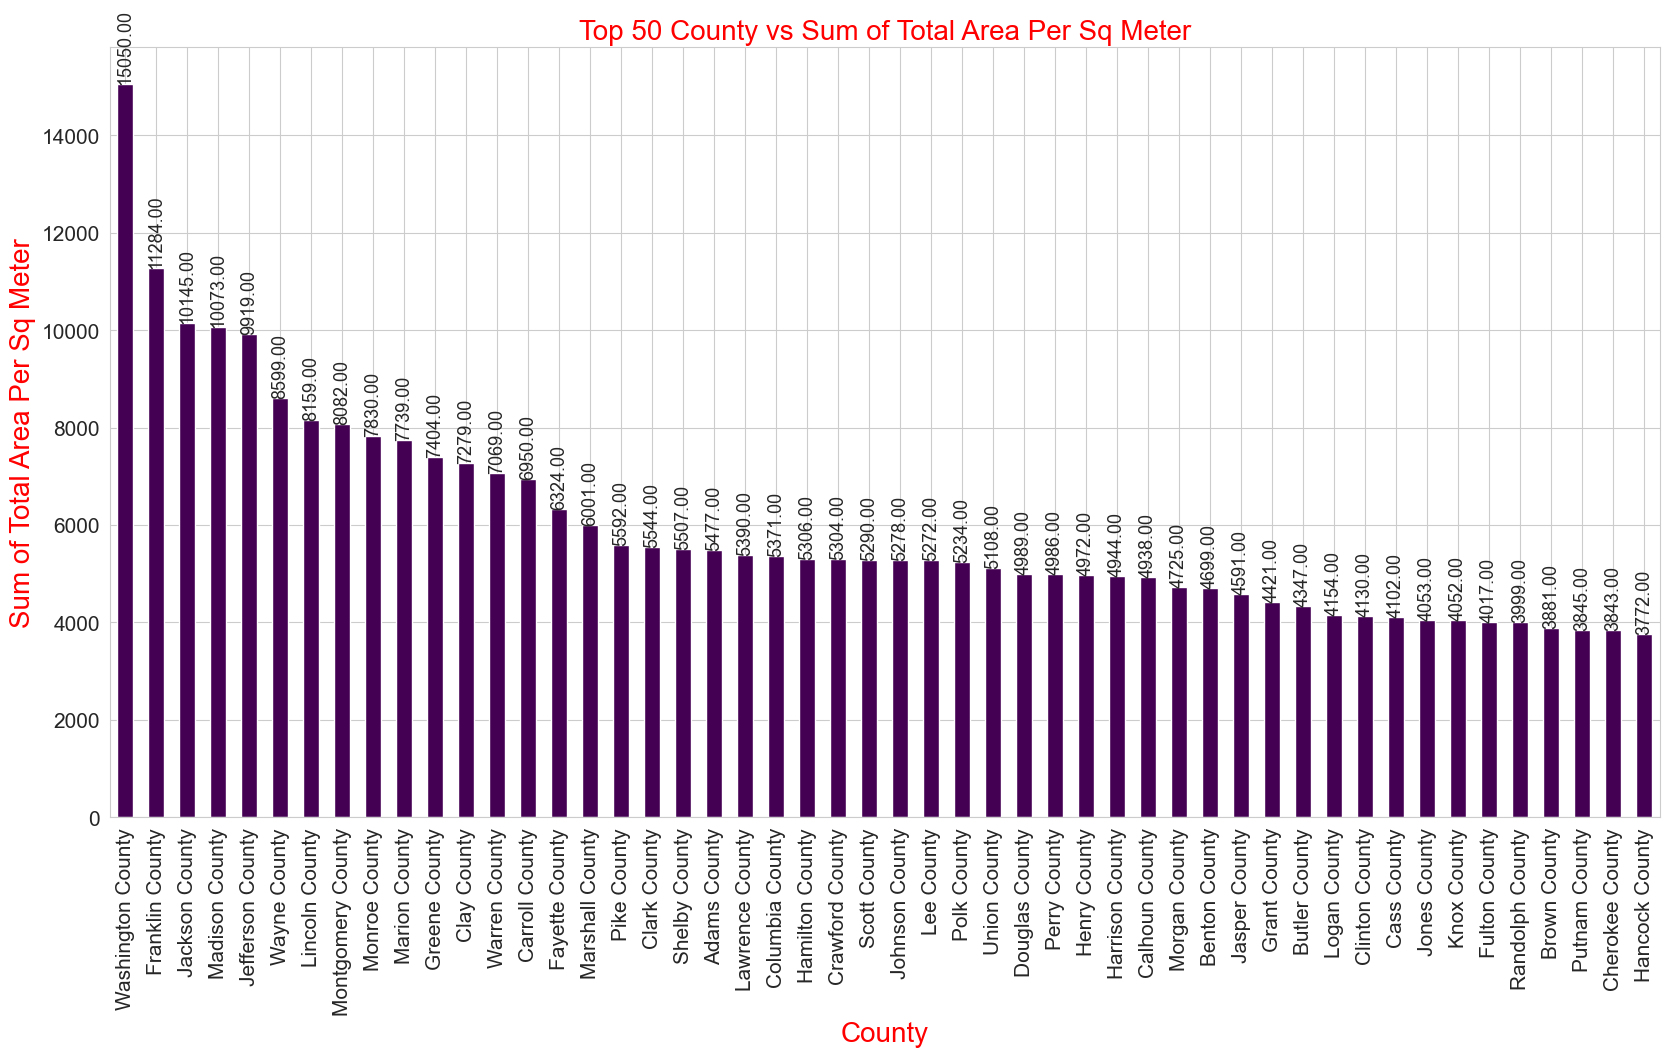

In [32]:
top_counties = df.groupby('County')['Total_Area(Sq-Mi)'].sum().nlargest(50)
top_counties.plot(kind='bar', figsize=(20,10),fontsize=15,colormap='viridis')
plt.xlabel('County',fontdict={'size':'20','color':'red'})
plt.ylabel('Sum of Total Area Per Sq Meter',fontdict={'size':'20','color':'red'})
plt.title('Top 50 County vs Sum of Total Area Per Sq Meter',fontdict={'size':'20','color':'red'})
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height:.2f}',(width, height),ha='center',va='bottom',rotation=90,fontsize=13)


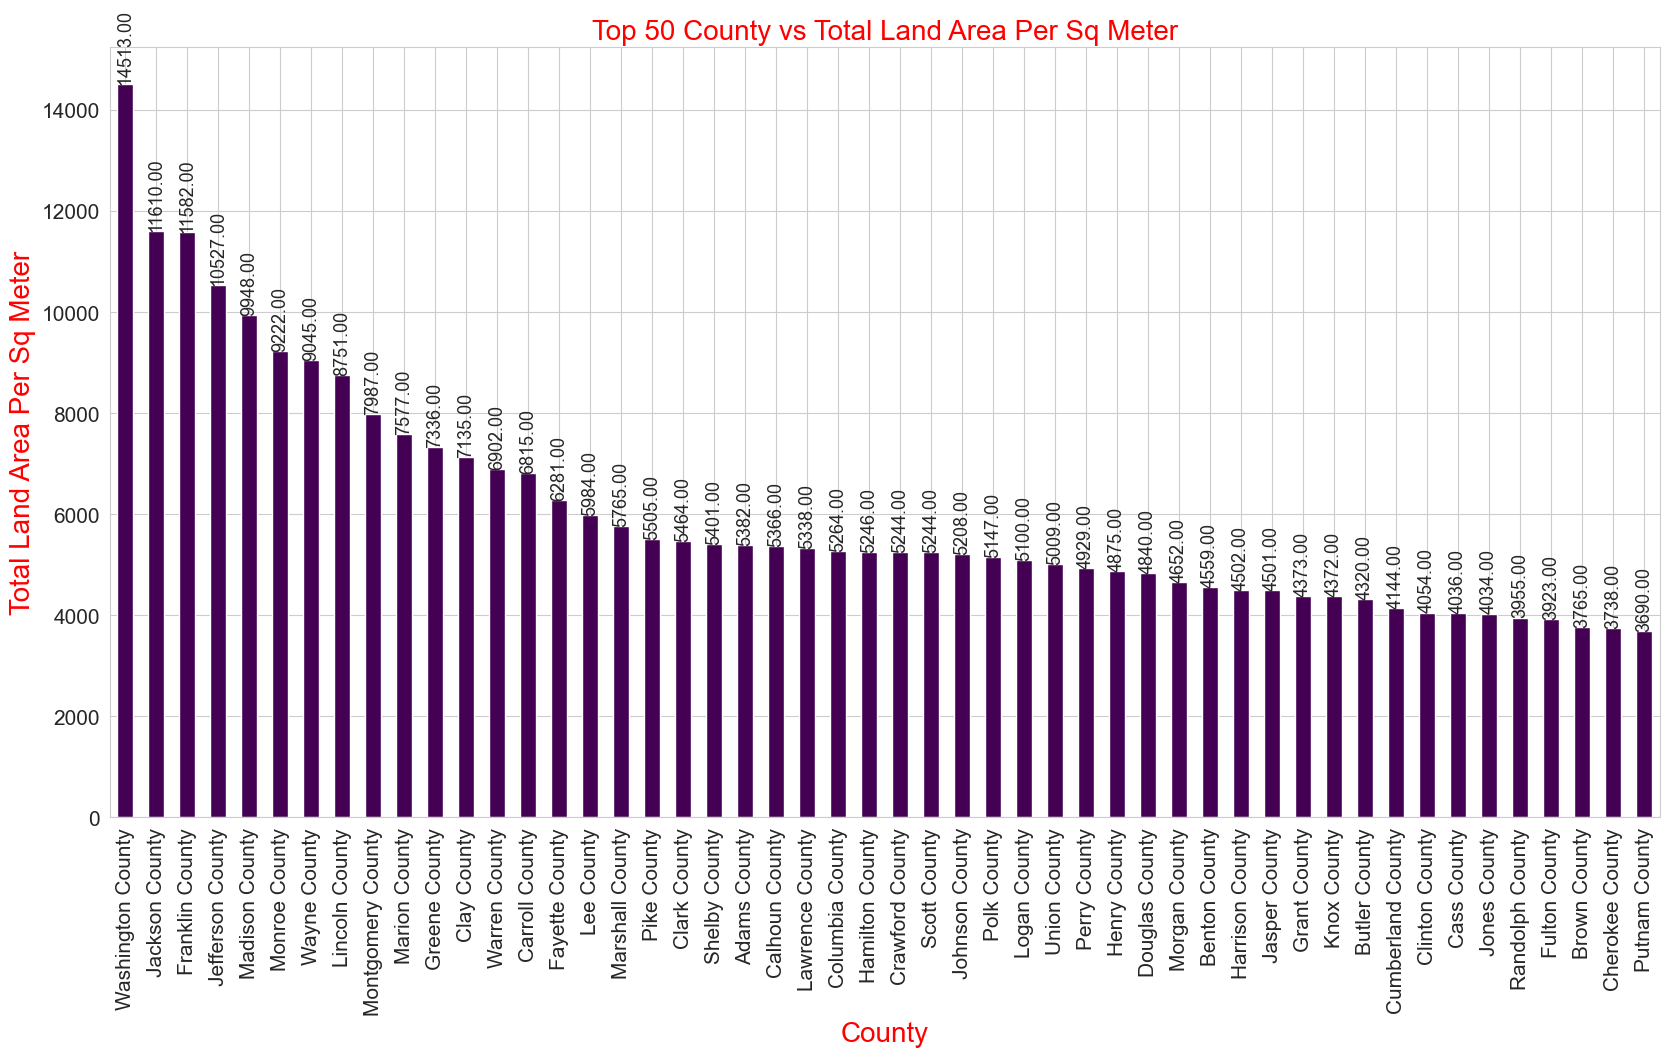

In [33]:
top_counties = df.groupby('County')['Land_Area(Sq-Mi)'].sum().nlargest(50)
top_counties.plot(kind='bar', figsize=(20,10),fontsize=15,colormap='viridis')
plt.xlabel('County',fontdict={'size':'20','color':'red'})
plt.ylabel('Total Land Area Per Sq Meter',fontdict={'size':'20','color':'red'})
plt.title('Top 50 County vs Total Land Area Per Sq Meter',fontdict={'size':'20','color':'red'})
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height:.2f}',(width, height),ha='center',va='bottom',rotation=90,fontsize=13)


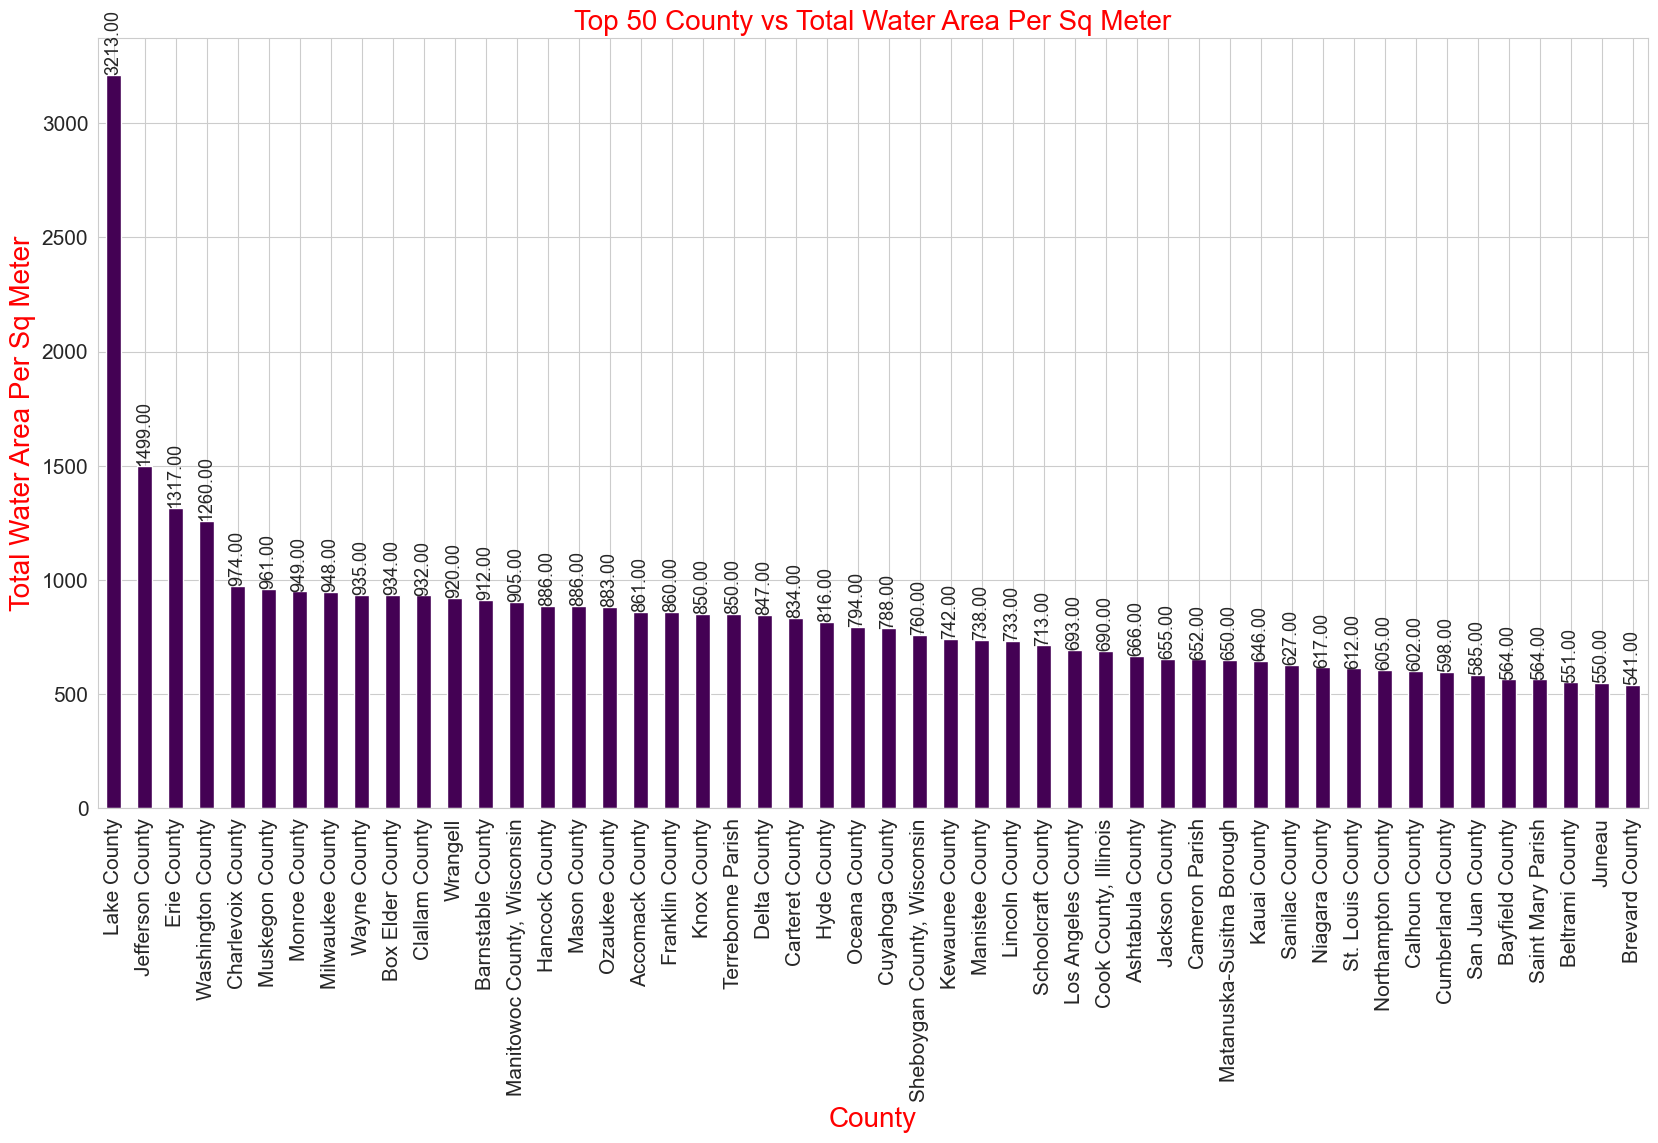

In [34]:
top_counties = df.groupby('County')['Water_Area(Sq-Mi)'].sum().nlargest(50)
top_counties.plot(kind='bar', figsize=(20,10),fontsize=15,colormap='viridis')
plt.xlabel('County',fontdict={'size':'20','color':'red'})
plt.ylabel('Total Water Area Per Sq Meter',fontdict={'size':'20','color':'red'})
plt.title('Top 50 County vs Total Water Area Per Sq Meter',fontdict={'size':'20','color':'red'})
for i in plt.gca().patches:
 height, width = i.get_height(),i.get_x() + i.get_width()/2
 plt.annotate(f'{height:.2f}',(width, height),ha='center',va='bottom',rotation=90,fontsize=13)
